In [ ]:
import json
import gdown
import pandas as pd
from datetime import datetime

# YouTube Watch History



*   The purpose and objectives of this project is to not only discover what
my hobbies and interests are on YouTube, but to potentially find new interests through textual analysis and frequency.



# Data Pre-Processing


In [ ]:
file_id = "1vrUWlFnG0NKBOtt9tEuKn_uh168JH9mF"
output = "YTWHdata.json"

# Download the JSON file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1vrUWlFnG0NKBOtt9tEuKn_uh168JH9mF
To: /content/YTWHdata.json
100%|██████████| 27.8M/27.8M [00:00<00:00, 135MB/s]


'YTWHdata.json'

In [ ]:
YTWatchH = pd.read_json("/content/YTWHdata.json")

# Display the Unscrapped, original DataFrame
print(YTWatchH.info())
print(YTWatchH.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69700 entries, 0 to 69699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            69700 non-null  object
 1   title             69700 non-null  object
 2   titleUrl          69185 non-null  object
 3   description       16796 non-null  object
 4   time              69700 non-null  object
 5   products          69700 non-null  object
 6   details           20653 non-null  object
 7   activityControls  69700 non-null  object
 8   subtitles         48136 non-null  object
dtypes: object(9)
memory usage: 4.8+ MB
None
    header                                              title  \
0  YouTube  Watched AWS Business Support | Amazon Web Serv...   
1  YouTube         Watched Download your Google Data [How to]   
2  YouTube  Watched Youtube Data Download Export Youtube D...   
3  YouTube  Watched Instagram Basic Display API: Getting a...   
4  YouTube  Watc

In [ ]:
# Where does my data begin
print(YTWatchH['time'].sort_values().head(1)) # 2020-06-11

#Where does my data end
print(YTWatchH['time'].sort_values().tail(1)) # 2025-02-12

69699    2020-06-11T16:52:39.866Z
Name: time, dtype: object
0    2025-02-12T20:41:59.133Z
Name: time, dtype: object


In [ ]:
titles = YTWatchH['title']
details = YTWatchH['details']
activityControls = YTWatchH['activityControls']

def extract_channel_name(subtitles):
  try:
    return subtitles[0]['name']
  except (IndexError, TypeError):
    return None  # Handle cases where subtitles is empty or not a list


channelName = YTWatchH['subtitles'].apply(extract_channel_name)

df = pd.DataFrame(list(zip(titles, details, activityControls, channelName)), columns=["Title", "Details", "activityControls","channelName"])

# Display the DataFrame with the titles, detials, activityControls, and channelName
print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69700 entries, 0 to 69699
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             69700 non-null  object
 1   Details           20653 non-null  object
 2   activityControls  69700 non-null  object
 3   channelName       48136 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB
None
                                               Title  \
0  Watched AWS Business Support | Amazon Web Serv...   
1         Watched Download your Google Data [How to]   
2  Watched Youtube Data Download Export Youtube D...   
3  Watched Instagram Basic Display API: Getting a...   
4  Watched Protect Your Screen and Your Eyes with...   

                         Details  \
0  [{'name': 'From Google Ads'}]   
1                            NaN   
2                            NaN   
3                            NaN   
4  [{'name': 'From Google Ads'}]   

                 

In [ ]:
import re

def is_youtube_url(text):
  """Checks if the given title text is a YouTube URL."""
  pattern = re.compile(r'(https?://)?(www\.)?(youtube|youtu|youtube-nocookie)\.(com|be)/')
  return bool(pattern.search(text))

# Apply the function to the 'titles' column and filter the DataFrame
df = df[~df['Title'].apply(is_youtube_url)]

# Drop very last record in Title becuase of an error in formmating creating an extra record by mistake
df = df.drop(df.index[-1])

print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             66778 non-null  object
 1   Details           19021 non-null  object
 2   activityControls  66778 non-null  object
 3   channelName       48077 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB
None
                                                   Title  \
0      Watched AWS Business Support | Amazon Web Serv...   
1             Watched Download your Google Data [How to]   
2      Watched Youtube Data Download Export Youtube D...   
3      Watched Instagram Basic Display API: Getting a...   
4      Watched Protect Your Screen and Your Eyes with...   
...                                                  ...   
69595  Watched RLCRAFT IS hardest game... I FINALLY S...   
69596  Watched i try beat HARDCORE MINECRAFT but chat...   
69597  Watched MY FIRST EVER IRL STR

In [ ]:
#Replace each record in the Details column if its not null with the string 'From Google Ads'
df.loc[df['Details'].notnull(), 'Details'] = 'From Google Ads'
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             66778 non-null  object
 1   Details           19021 non-null  object
 2   activityControls  66778 non-null  object
 3   channelName       48077 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB
None
                                                   Title          Details  \
0      Watched AWS Business Support | Amazon Web Serv...  From Google Ads   
1             Watched Download your Google Data [How to]              NaN   
2      Watched Youtube Data Download Export Youtube D...              NaN   
3      Watched Instagram Basic Display API: Getting a...              NaN   
4      Watched Protect Your Screen and Your Eyes with...  From Google Ads   
...                                                  ...              ...   
69595  Watched RLCRAFT IS hardest gam

In [ ]:
def extract_activity_type(activity_controls, activity_type):
    """Checks if the given activity type is present in the activityControls list.
    Returns 1 if present, 0 otherwise.
    """
    for activity in activity_controls:
        if activity == activity_type:
            return 1
    return 0

# Create new columns based on activity types
df['YouTube Watch History'] = df['activityControls'].apply(lambda x: extract_activity_type(x, 'YouTube watch history'))
df['YouTube Search History'] = df['activityControls'].apply(lambda x: extract_activity_type(x, 'YouTube search history'))

# Drop the original 'activityControls' column if needed
df.drop(columns=['activityControls'], inplace=True)
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   Details                 19021 non-null  object
 2   channelName             48077 non-null  object
 3   YouTube Watch History   66778 non-null  int64 
 4   YouTube Search History  66778 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.1+ MB
None
                                                   Title          Details  \
0      Watched AWS Business Support | Amazon Web Serv...  From Google Ads   
1             Watched Download your Google Data [How to]              NaN   
2      Watched Youtube Data Download Export Youtube D...              NaN   
3      Watched Instagram Basic Display API: Getting a...              NaN   
4      Watched Protect Your Screen and Your Eyes with...  From Google Ads   
...             

In [ ]:
# Make Details Column into a Binary column and rename to "IsGoogleAd"
df['IsGoogleAd'] = df['Details'].apply(lambda x: 1 if x == 'From Google Ads' else 0)

# Drop the original 'Details' column if needed
df.drop(columns=['Details'], inplace=True)
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 66778 entries, 0 to 69599
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   channelName             48077 non-null  object
 2   YouTube Watch History   66778 non-null  int64 
 3   YouTube Search History  66778 non-null  int64 
 4   IsGoogleAd              66778 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.1+ MB
None
                                                   Title     channelName  \
0      Watched AWS Business Support | Amazon Web Serv...            None   
1             Watched Download your Google Data [How to]  Teacher's Tech   
2      Watched Youtube Data Download Export Youtube D...     Designopage   
3      Watched Instagram Basic Display API: Getting a...   Justin Stolpe   
4      Watched Protect Your Screen and Your Eyes with...            None   
...                   

In [ ]:
# Display the updated DataFrame
df.reset_index(drop=True, inplace=True)

print(df.info())
print('\n------------------------------------------------------------\n',df)
print('\n------------------------------------------------------------\n')
print("Number of records", len(df))
print("Number of attributes", len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   channelName             48077 non-null  object
 2   YouTube Watch History   66778 non-null  int64 
 3   YouTube Search History  66778 non-null  int64 
 4   IsGoogleAd              66778 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ MB
None

------------------------------------------------------------
                                                    Title     channelName  \
0      Watched AWS Business Support | Amazon Web Serv...            None   
1             Watched Download your Google Data [How to]  Teacher's Tech   
2      Watched Youtube Data Download Export Youtube D...     Designopage   
3      Watched Instagram Basic Display API: Getting a...   Justin Stolpe   
4      Watched Protect Your Sc

In [ ]:
none_count = df['channelName'].isnull().sum()
print(f"Number of 'None' values in 'channelName': {none_count}")

Number of 'None' values in 'channelName': 18701


In [ ]:
# list videos with no channelName and count all IsGoogleAd values if set to 1
print(df[df['channelName'].isnull()]['IsGoogleAd'].value_counts())

IsGoogleAd
1    18698
0        3
Name: count, dtype: int64


In [ ]:
# Most counts of a channelName = Most popular YouTube channel I viewed
print(df.groupby('channelName').size().reset_index(name='Count').sort_values(['Count'],ascending = False).head(10))

           channelName  Count
6816      VanossGaming   1660
2290       Frost Prime    890
6492  TheRussianBadger    862
4549        Not Albino    692
8142             zanny    635
1115  CarbotAnimations    630
2880         IcemanBry    626
7704      lionheartx10    613
6926           WILDCAT    540
6558              Tmal    533


In [ ]:
# Most popular YouTube video I viewed that isn't a Google Ad and starts with the word 'Watched'
print(df[(df['IsGoogleAd'] == 0) & (df['Title'].str.startswith('Watched'))].groupby('Title').size().reset_index(name='Count').sort_values(['Count'],ascending = False).head(10))

                                                   Title  Count
18376                    Watched New Order - Blue Monday     35
6507   Watched Dead Or Alive - You Spin Me Round (Lik...     32
10501  Watched Gangstar Torture Dance FULL SONG (LYRI...     32
32073                Watched the girl next door - ON TOP     32
19568  Watched Pentatonix - God Rest Ye Merry Gentlem...     32
10139       Watched GIGACHAD SONG (Doom Eternal Version)     29
3566   Watched Bloodborne Review | Defeat Gods | Doll...     28
1622   Watched An Incorrect Summary of ULTRAKILL | Act 1     26
12139                         Watched Higher Than Heaven     25
25503                  Watched The Men of War Experience     25


In [ ]:
# Using NLP, what's the most frequent terms in video titles?
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('stopwords')

# Preprocess the video titles: remove punctuation, convert to lowercase, and tokenize
df['Video Title Tags'] = df['Title'].str.replace(r'[^\w\s]+', '', regex=True).str.lower()
titles = df['Video Title Tags'].dropna().tolist()
tokens = [word for title in titles for word in title.split()]

# Filter out stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

# Count the frequency of each word
word_counts = Counter(filtered_tokens)

# Get the most common words
most_common_words = word_counts.most_common(15)

# Display the 15 most common terms in a table
print("Most Common Terms in Video Titles:")
print(pd.DataFrame(most_common_words, columns=['Term', 'Frequency']))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Terms in Video Titles:
       Term  Frequency
0   watched      65446
1         2       5709
2       new       2166
3         3       1980
4       war       1834
5     funny       1768
6   moments       1660
7   fallout       1573
8        06       1569
9    shorts       1566
10        1       1549
11    elden       1490
12     ring       1446
13     game       1436
14       en       1360


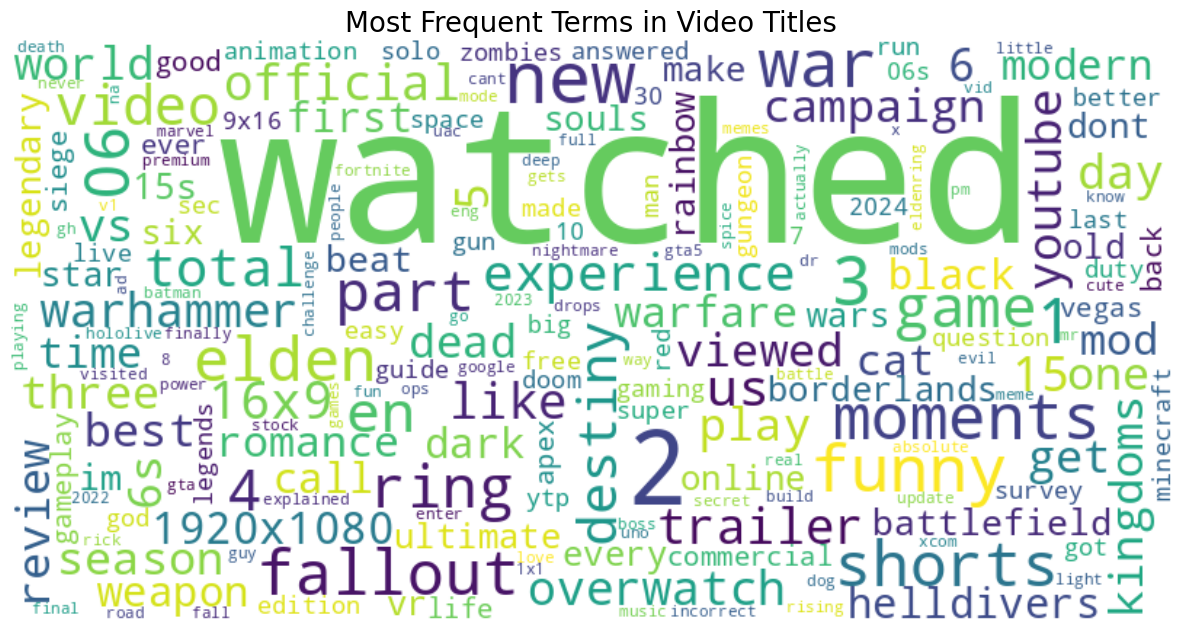

In [ ]:
# Plot a world cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Most Frequent Terms in Video Titles', fontsize=20)
plt.show()

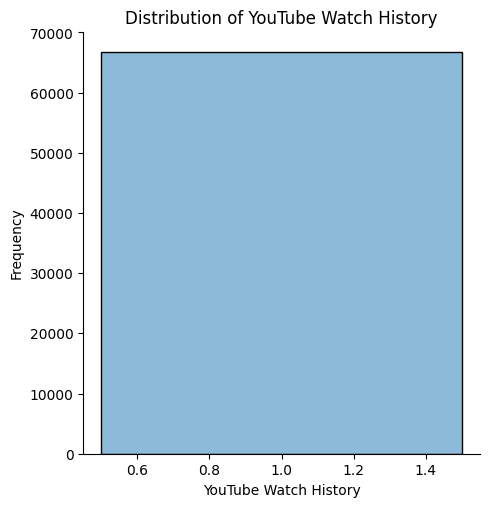

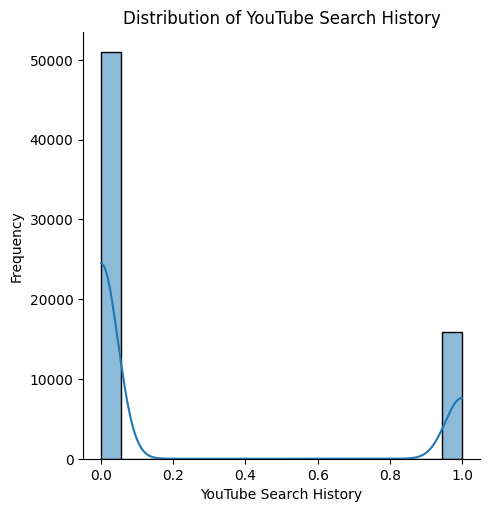

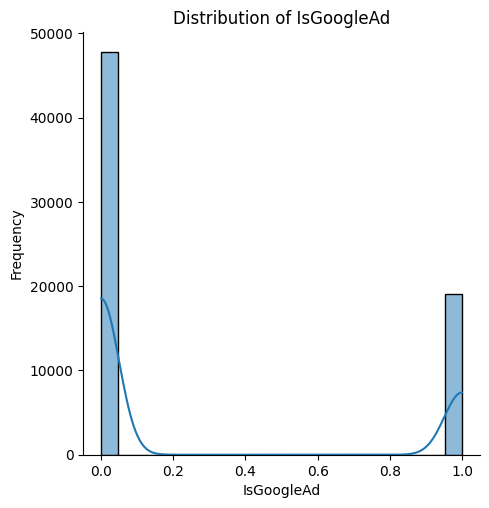

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each column in the DataFrame
for column in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Create a distribution plot using seaborn
        sns.displot(df[column], kde=True)  # kde=True adds a kernel density estimate curve
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  # Display the plot

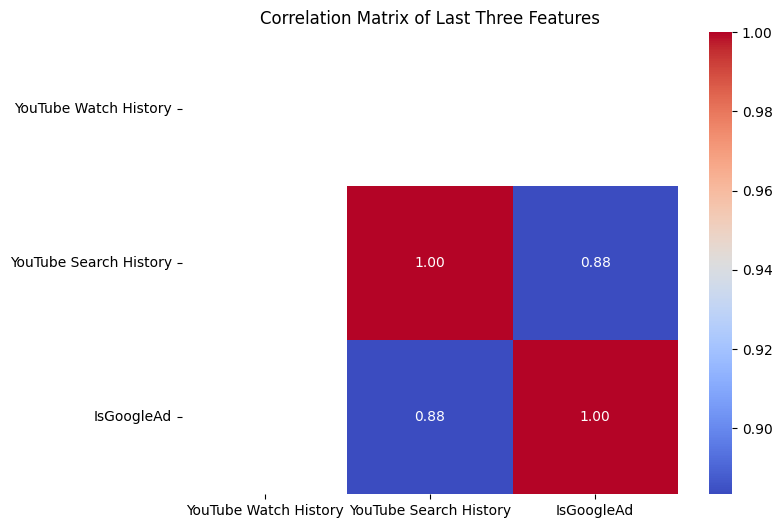

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the last three features
selected_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for selected features
correlation_matrix = selected_features.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Last Three Features')
plt.show()

In [ ]:
# Drop YouTube Watch History column
dfcopy = df.copy()
dfcopy = dfcopy.drop(columns=['YouTube Watch History'])
print(dfcopy.info())
print(dfcopy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   channelName             48077 non-null  object
 2   YouTube Search History  66778 non-null  int64 
 3   IsGoogleAd              66778 non-null  int64 
 4   Video Title Tags        66778 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.5+ MB
None
                                                   Title     channelName  \
0      Watched AWS Business Support | Amazon Web Serv...            None   
1             Watched Download your Google Data [How to]  Teacher's Tech   
2      Watched Youtube Data Download Export Youtube D...     Designopage   
3      Watched Instagram Basic Display API: Getting a...   Justin Stolpe   
4      Watched Protect Your Screen and Your Eyes with...            None   
...              

In [ ]:
# Remove word 'Watched' in title
dfcopy['Title'] = dfcopy['Title'].str.replace(r'^Watched\s+', '', regex=True)
print(dfcopy.info())
print(dfcopy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   channelName             48077 non-null  object
 2   YouTube Search History  66778 non-null  int64 
 3   IsGoogleAd              66778 non-null  int64 
 4   Video Title Tags        66778 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.5+ MB
None
                                                   Title     channelName  \
0             AWS Business Support | Amazon Web Services            None   
1                     Download your Google Data [How to]  Teacher's Tech   
2      Youtube Data Download Export Youtube Data cont...     Designopage   
3      Instagram Basic Display API: Getting a Users I...   Justin Stolpe   
4      Protect Your Screen and Your Eyes with the ZAG...            None   
...              

In [ ]:
# Drop Video Title tags
dfcopy = dfcopy.drop(columns=['Video Title Tags'])
print(dfcopy.info())
print(dfcopy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   channelName             48077 non-null  object
 2   YouTube Search History  66778 non-null  int64 
 3   IsGoogleAd              66778 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ MB
None
                                                   Title     channelName  \
0             AWS Business Support | Amazon Web Services            None   
1                     Download your Google Data [How to]  Teacher's Tech   
2      Youtube Data Download Export Youtube Data cont...     Designopage   
3      Instagram Basic Display API: Getting a Users I...   Justin Stolpe   
4      Protect Your Screen and Your Eyes with the ZAG...            None   
...                                                  ...             

In [ ]:
# Replace None values in channelName with word Google Advertisment
dfcopy['channelName'] = dfcopy['channelName'].fillna('Google Advertisement')
print(dfcopy.info())
print(dfcopy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   channelName             66778 non-null  object
 2   YouTube Search History  66778 non-null  int64 
 3   IsGoogleAd              66778 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ MB
None
                                                   Title  \
0             AWS Business Support | Amazon Web Services   
1                     Download your Google Data [How to]   
2      Youtube Data Download Export Youtube Data cont...   
3      Instagram Basic Display API: Getting a Users I...   
4      Protect Your Screen and Your Eyes with the ZAG...   
...                                                  ...   
66773         RLCRAFT IS hardest game... I FINALLY SNAP-   
66774    i try beat HARDCORE MINECRAFT but ch

In [ ]:
# Clean Title and channelName to only have alaphbetical letters
dfcopy['Title'] = dfcopy['Title'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
dfcopy['channelName'] = dfcopy['channelName'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
print(dfcopy.info())
print(dfcopy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   66778 non-null  object
 1   channelName             66778 non-null  object
 2   YouTube Search History  66778 non-null  int64 
 3   IsGoogleAd              66778 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ MB
None
                                                   Title  \
0              AWS Business Support  Amazon Web Services   
1                       Download your Google Data How to   
2      Youtube Data Download Export Youtube Data cont...   
3      Instagram Basic Display API Getting a Users In...   
4      Protect Your Screen and Your Eyes with the ZAG...   
...                                                  ...   
66773             RLCRAFT IS hardest game I FINALLY SNAP   
66774    i try beat HARDCORE MINECRAFT but ch

In [ ]:
# Use frequency encoding for high cardinality for channel Name and make a new column for the frequency
channelName_freq = dfcopy['channelName'].value_counts(normalize=True)
dfcopy['channelName_freq'] = dfcopy['channelName'].map(channelName_freq)
print(dfcopy.info())
print(dfcopy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66778 entries, 0 to 66777
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   66778 non-null  object 
 1   channelName             66778 non-null  object 
 2   YouTube Search History  66778 non-null  int64  
 3   IsGoogleAd              66778 non-null  int64  
 4   channelName_freq        66778 non-null  float64
 5   processed_title         66778 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.1+ MB
None
                                                   Title  \
0              AWS Business Support  Amazon Web Services   
1                       Download your Google Data How to   
2      Youtube Data Download Export Youtube Data cont...   
3      Instagram Basic Display API Getting a Users In...   
4      Protect Your Screen and Your Eyes with the ZAG...   
...                                      

# Supervised Models

Text-Based Classification Model (Title Analysis)

---




In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def preprocess_text(text):
  # Lowercase the text
  text = text.lower()
  # Remove punctuation and special characters
  text = re.sub(r'[^\w\s]', '', text)
  # Tokenize the text
  tokens = nltk.word_tokenize(text)
  # Remove stop words
  tokens = [token for token in tokens if token not in stopwords.words('english')]
  # Lemmatize the tokens
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]
  # Return the preprocessed text
  return ' '.join(tokens)

# Apply preprocessing to your video titles
dfcopy['processed_title'] = dfcopy['Title'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the preprocessed titles
X = vectorizer.fit_transform(dfcopy['processed_title'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Define the models to evaluate
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
}


# Assuming 'channelName_freq' is my target variable and X is your feature matrix
# Convert 'channelName_freq' to discrete labels using Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dfcopy['channelName_freq'])
y = y_encoded # Use the encoded labels as the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through the models
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("-" * 20)  # Separator between models

Evaluating Naive Bayes...
Accuracy: 0.47386942198262955
              precision    recall  f1-score   support

           0       0.17      0.49      0.25      1134
           1       0.06      0.00      0.01       430
           2       0.09      0.00      0.01       238
           3       0.25      0.01      0.02       216
           4       0.33      0.01      0.01       168
           5       0.50      0.01      0.02       112
           6       0.75      0.02      0.04       166
           7       0.00      0.00      0.00        88
           8       0.00      0.00      0.00        73
           9       0.00      0.00      0.00        80
          10       0.50      0.01      0.02        86
          11       0.00      0.00      0.00        60
          12       1.00      0.03      0.06        63
          13       0.00      0.00      0.00        56
          14       0.67      0.03      0.05        70
          15       1.00      0.02      0.04        48
          16       0.62  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/l

Accuracy: 0.5337675950883498
              precision    recall  f1-score   support

           0       0.22      0.40      0.29      1134
           1       0.11      0.02      0.03       430
           2       0.16      0.02      0.04       238
           3       0.14      0.02      0.03       216
           4       0.00      0.00      0.00       168
           5       0.36      0.04      0.07       112
           6       0.62      0.05      0.09       166
           7       0.54      0.15      0.23        88
           8       0.09      0.01      0.02        73
           9       0.82      0.11      0.20        80
          10       0.50      0.17      0.26        86
          11       0.64      0.12      0.20        60
          12       0.79      0.35      0.48        63
          13       0.46      0.11      0.17        56
          14       0.71      0.17      0.28        70
          15       0.50      0.12      0.20        48
          16       0.71      0.18      0.29        5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6212189278227014
              precision    recall  f1-score   support

           0       0.30      0.32      0.31      1134
           1       0.38      0.22      0.28       430
           2       0.42      0.21      0.28       238
           3       0.45      0.31      0.36       216
           4       0.45      0.27      0.33       168
           5       0.48      0.27      0.34       112
           6       0.64      0.31      0.41       166
           7       0.65      0.23      0.34        88
           8       0.41      0.25      0.31        73
           9       0.58      0.39      0.47        80
          10       0.74      0.45      0.56        86
          11       0.45      0.25      0.32        60
          12       0.69      0.49      0.57        63
          13       0.64      0.41      0.50        56
          14       0.60      0.39      0.47        70
          15       0.69      0.42      0.52        48
          16       0.54      0.40      0.46        5

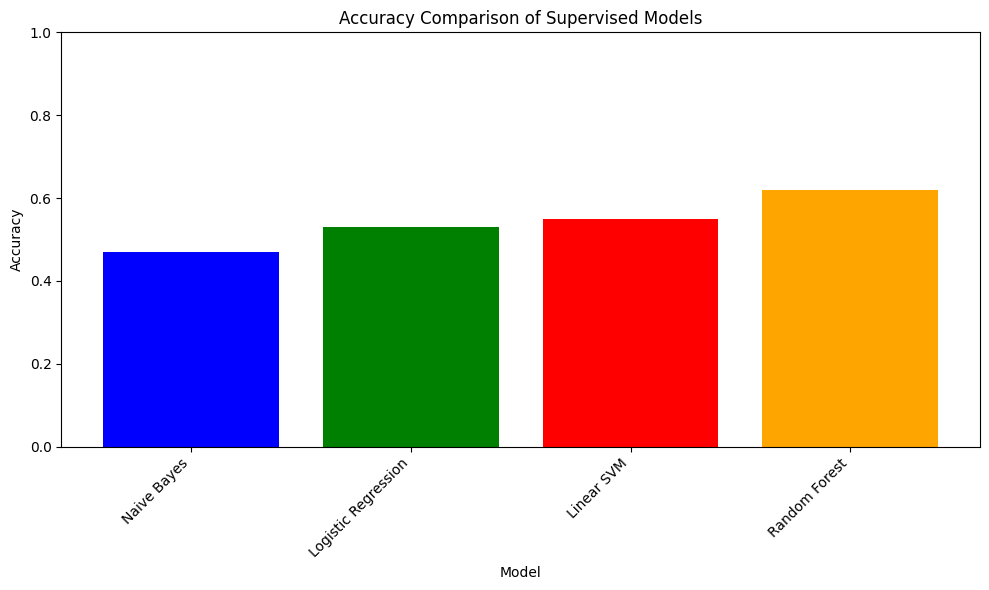

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_accuracies = {
     "Naive Bayes": 0.47,
     "Logistic Regression": 0.53,
     "Linear SVM": 0.55,
     "Random Forest": 0.62,}


# Assuming you have a dictionary 'model_accuracies' with model names and accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Accuracy Comparison of Supervised Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()



# Unsupervised Models

In [ ]:
# 1 Topic Modeling with Latent Dirichlet Allocation (LDA)
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Return the preprocessed text
    return ' '.join(tokens)

# Apply preprocessing to my video titles
dfcopy['processed_title'] = dfcopy['Title'].apply(preprocess_text)

# Create a CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
# Fit and transform the preprocessed titles
X = vectorizer.fit_transform(dfcopy['processed_title'])

# Create an LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components as needed

# Fit the model to my  data
lda_model.fit(X)

# Analyze the results (print top words for each topic)
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i]
                    for i in topic.argsort()[:-10 - 1:-1]]))
    print("\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic #1:
overwatch part en experience soul dark ultimate viewed day make


Topic #2:
new fallout destiny season weapon helldivers warfare modern old commercial


Topic #3:
short get one cat best time dont question life good


Topic #4:
moment funny elden ring gta call black mod like online


Topic #5:
game war total video official trailer kingdom three ep campaign




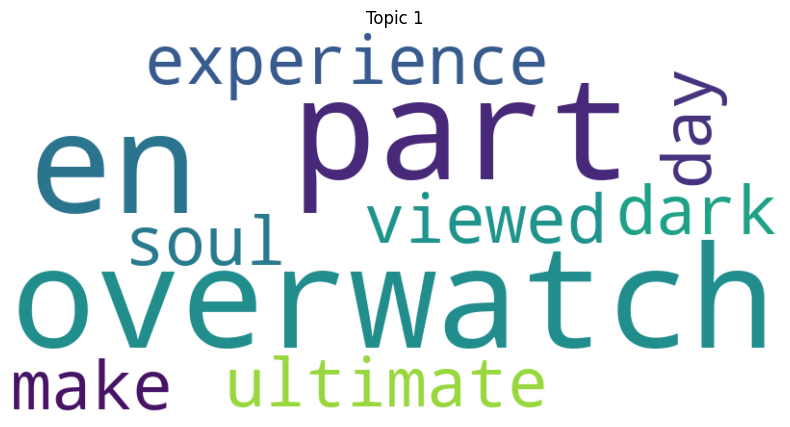

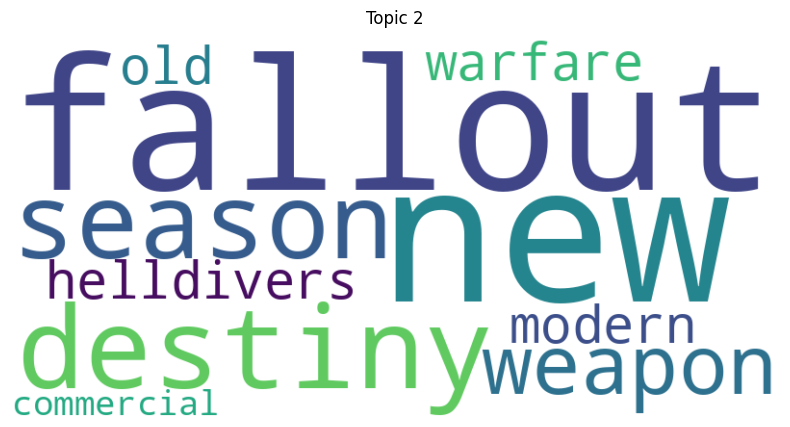

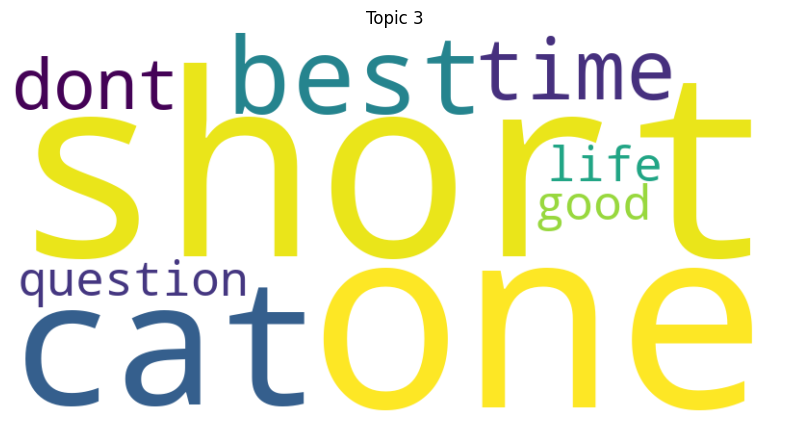

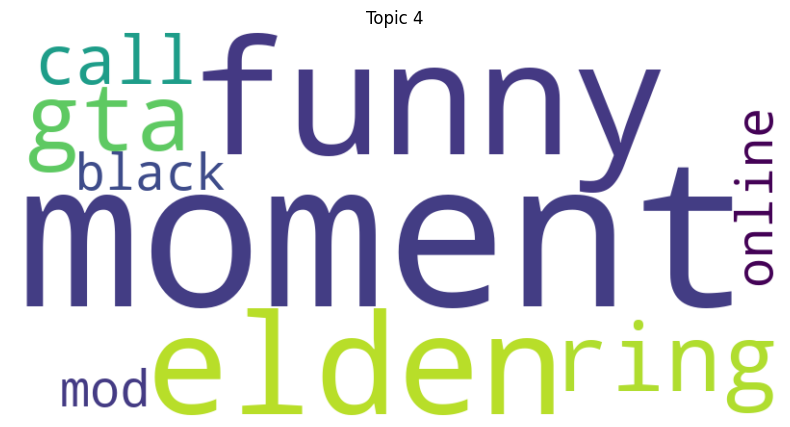

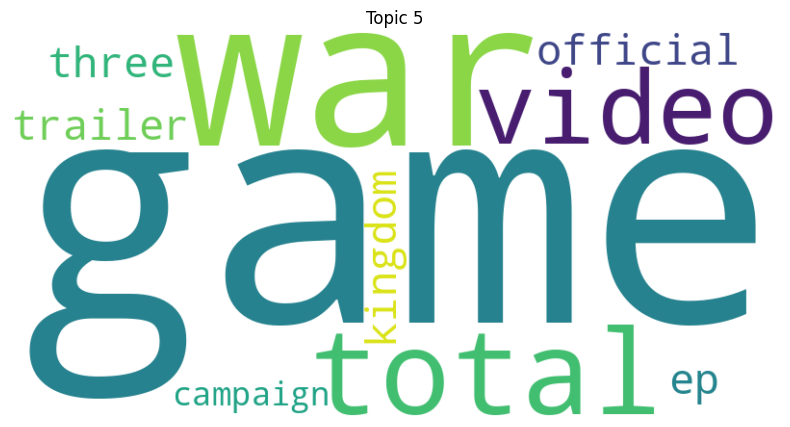

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top words for each topic
topic_words = {}
for topic_idx, topic in enumerate(lda_model.components_):
    topic_words[f"Topic {topic_idx + 1}"] = " ".join([vectorizer.get_feature_names_out()[i]
                                                    for i in topic.argsort()[:-10 - 1:-1]])

# Generate a word cloud for each topic
for topic_name, words in topic_words.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topic_name)
    plt.show()

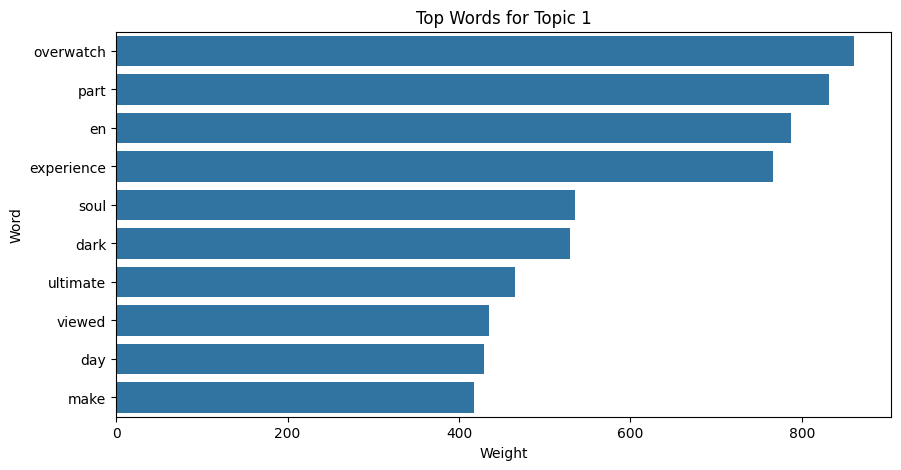

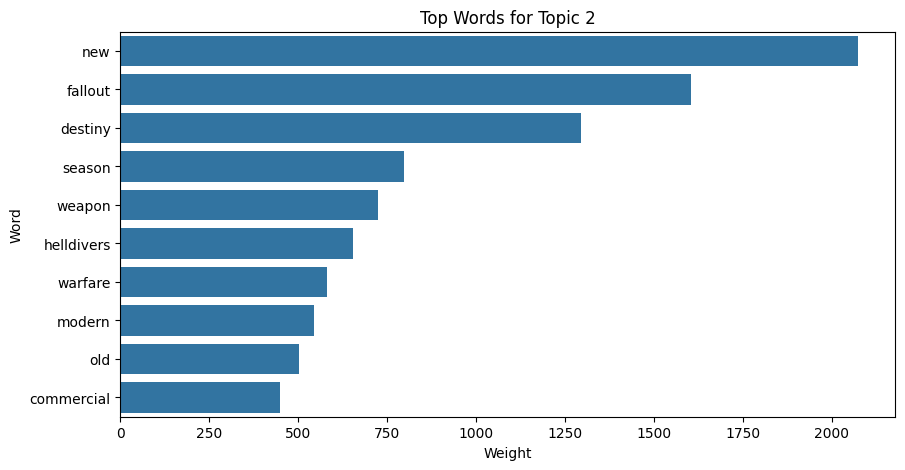

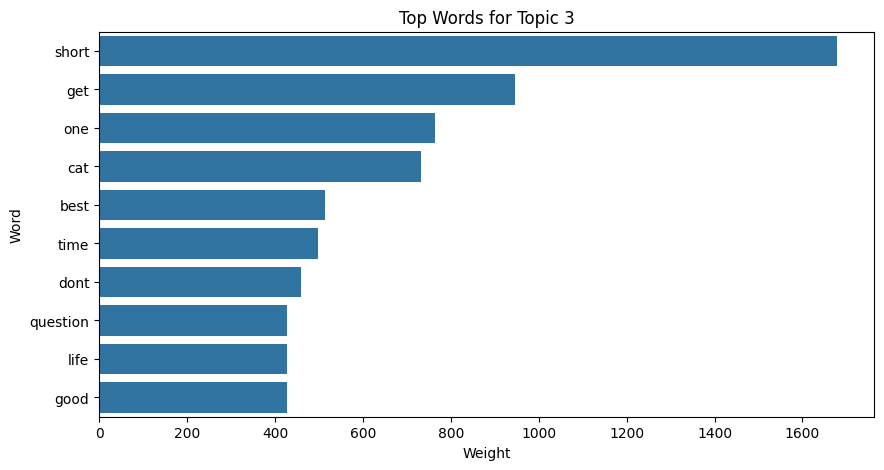

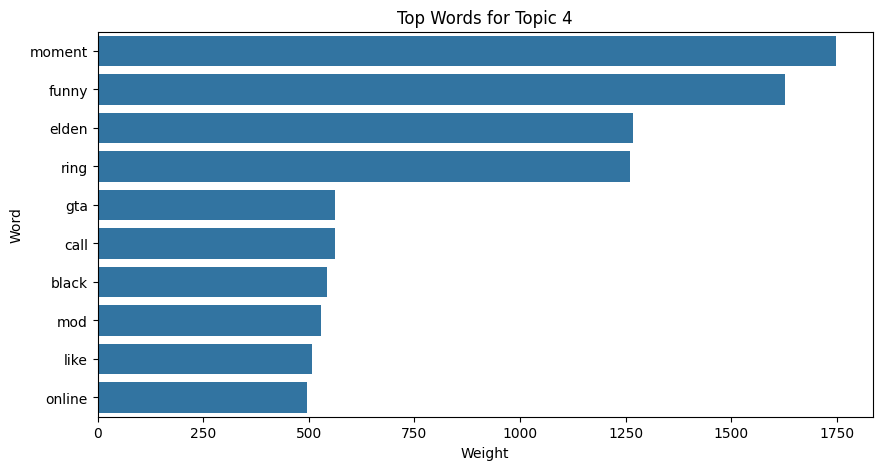

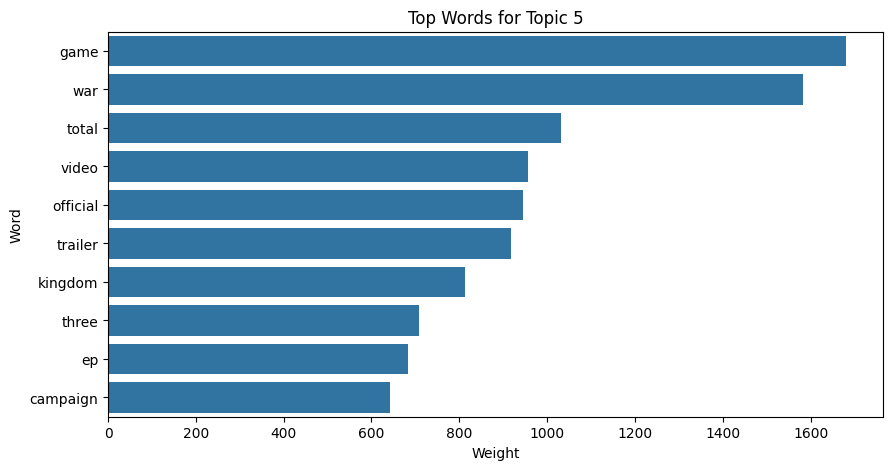

In [ ]:
import pandas as pd
import seaborn as sns

# Create a DataFrame for the top words
top_words_df = pd.DataFrame(lda_model.components_, columns=vectorizer.get_feature_names_out())
top_words_df = top_words_df.T.reset_index()
top_words_df = top_words_df.rename(columns={0: 'Topic 1', 1: 'Topic 2', 2: 'Topic 3', 3: 'Topic 4', 4: 'Topic 5'})  # Adjust column names as needed

# Plot the top words for each topic
for topic in top_words_df.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=topic, y='index', data=top_words_df.sort_values(by=topic, ascending=False).head(10))
    plt.title(f"Top Words for {topic}")
    plt.xlabel("Weight")
    plt.ylabel("Word")
    plt.show()